# Finite difference equations code
Finite difference equations (also known as maps) are simple time-discrete dynamical systems.
In every time step the rules (mathematical functions) are applied which give the updated state for the next time point.

- discrete time
- rules which update state(s)

$$x_{t+1} = f(x_{t})$$

## Simulator for maps
To be able to analyze maps, we first have to write a simulator which allows to simulate the time evolution from a given initial state $x0$.
The simulator looks very similar to the boolean networks, only that we now can have any state (`float`) not just binary state (`bool`). Again we iterate over a loop (simulation steps) and in every loop we apply the rules `f`. Maps are like boolean networks discrete in time and update states via rules/functions.

In [50]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint

def map_simulate(x0, f_rules, steps=10, print_results=True):
    """ simulates map. """
    states = np.zeros(shape=((steps+1), x0.size), dtype=float)
    
    
    pprint("x0 = {}".format(x0.astype(np.float)))
    states[0, :] = x0
    for k in range(steps):
        x = states[k]
        states[k+1, :] = f_rules(states[k, :])
        
    # convert to pandas data frame
    names = [f"S{k}" for k in range(x0.size)]
    index = [f"x{k}" for k in range(steps+1)]
    df = pd.DataFrame(states, columns=names, index=index)
    # add time column
    df["time"] = range(steps+1)
    
    if print_results:
        print(df)
        print("-" * 40)
    return df

## Linear map
We can use our simulator to run the the linear map example from the lecture.
We use a function generator which creates us our map function for a given R parameter.

In [51]:
def f_linear_factory(R=1.0):
    """x(t+1) = R * x"""
    print(f"Creating f_linear: 'x(t+1) = {R} * x'")
    
    def f_linear(x, R=R):
        """ Linear map. """
        x_new = R * x
        return x_new
    
    return f_linear

Now we run the map starting from 1.0 with different `R` values

In [52]:
df1 = map_simulate(x0=np.array([1.0]), f_rules=f_linear_factory(R=0.8), steps=10)

Creating f_linear: 'x(t+1) = 0.8 * x'
'x0 = [1.]'
           S0  time
x0   1.000000     0
x1   0.800000     1
x2   0.640000     2
x3   0.512000     3
x4   0.409600     4
x5   0.327680     5
x6   0.262144     6
x7   0.209715     7
x8   0.167772     8
x9   0.134218     9
x10  0.107374    10
----------------------------------------


For R values in `0 < R < 1` our state is decaying towards zero, but for R values `R>1.0` we see exponential growth

In [53]:
df2 = map_simulate(x0 = np.array([1.0]), f_rules=f_linear_factory(R=1.5))

Creating f_linear: 'x(t+1) = 1.5 * x'
'x0 = [1.]'
            S0  time
x0    1.000000     0
x1    1.500000     1
x2    2.250000     2
x3    3.375000     3
x4    5.062500     4
x5    7.593750     5
x6   11.390625     6
x7   17.085938     7
x8   25.628906     8
x9   38.443359     9
x10  57.665039    10
----------------------------------------


Our simulator also works for multiple states:

In [54]:
# this works also for maps with multiple state variables
df2 = map_simulate(x0 = np.array([1.0, 2.0, 3.0]), f_rules=f_linear_factory(R=-0.8))

Creating f_linear: 'x(t+1) = -0.8 * x'
'x0 = [1. 2. 3.]'
           S0        S1        S2  time
x0   1.000000  2.000000  3.000000     0
x1  -0.800000 -1.600000 -2.400000     1
x2   0.640000  1.280000  1.920000     2
x3  -0.512000 -1.024000 -1.536000     3
x4   0.409600  0.819200  1.228800     4
x5  -0.327680 -0.655360 -0.983040     5
x6   0.262144  0.524288  0.786432     6
x7  -0.209715 -0.419430 -0.629146     7
x8   0.167772  0.335544  0.503316     8
x9  -0.134218 -0.268435 -0.402653     9
x10  0.107374  0.214748  0.322123    10
----------------------------------------


Creating f_linear: 'x(t+1) = -2.0 * x'
'x0 = [1.]'
         S0  time
x0      1.0     0
x1     -2.0     1
x2      4.0     2
x3     -8.0     3
x4     16.0     4
x5    -32.0     5
x6     64.0     6
x7   -128.0     7
x8    256.0     8
x9   -512.0     9
x10  1024.0    10
----------------------------------------
Creating f_linear: 'x(t+1) = -1.0 * x'
'x0 = [1.]'
      S0  time
x0   1.0     0
x1  -1.0     1
x2   1.0     2
x3  -1.0     3
x4   1.0     4
x5  -1.0     5
x6   1.0     6
x7  -1.0     7
x8   1.0     8
x9  -1.0     9
x10  1.0    10
----------------------------------------
Creating f_linear: 'x(t+1) = -0.5 * x'
'x0 = [1.]'
           S0  time
x0   1.000000     0
x1  -0.500000     1
x2   0.250000     2
x3  -0.125000     3
x4   0.062500     4
x5  -0.031250     5
x6   0.015625     6
x7  -0.007812     7
x8   0.003906     8
x9  -0.001953     9
x10  0.000977    10
----------------------------------------
Creating f_linear: 'x(t+1) = 0.0 * x'
'x0 = [1.]'
      S0  time
x0   1.0     0
x1   0.0

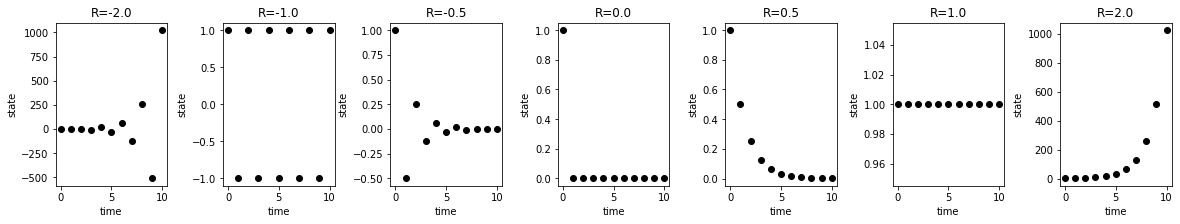

In [55]:
# simulate the various R values
R_values = [-2.0, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0]
results = []
for R in R_values:
    results.append(
        map_simulate(x0 = np.array([1.0]), f_rules=f_linear_factory(R=R))
    )

# plot results
f, axes = plt.subplots(nrows=1, ncols=len(R_values), figsize=(20, 3))
f.subplots_adjust(wspace=0.5)
for k, R in enumerate(R_values):
    ax = axes[k]
    df = results[k]
    ax.plot(df.time, df.S0, 'o', color="black")
    ax.set_title(f"R={R}")
    ax.set_ylabel("state")
    ax.set_xlabel("time")

plt.show()
f.savefig("./images/linear_map.png", bbox_inches="tight", dpi=150)

## Web plot
We can analyze the behavior of maps visually by using web plots. These plots show the time evolution from a given initial state for 1-dimensional maps.

In [56]:
def web_plot(x0, f_rules, steps=10):
    """Web plot for given map."""

    # get time series values
    df = map_simulate(x0, f_rules, steps=steps)
    x_series = df.S0.values
    
    xvec = np.linspace(0, max(1, max(x_series)), num=40)
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
    ax.plot(xvec, f_rules(xvec), label="map")   # plot map
    ax.plot(xvec, xvec, color="darkgrey", label="union line")  # union line    
    
    x_web = []
    y_web = []
    for k in range(len(x_series)):
        if k==0:
            x_web.append(x_series[0])
            y_web.append(0)
        else:
            x_web.append(x_series[k-1])
            y_web.append(x_series[k])

            x_web.append(x_series[k])
            y_web.append(x_series[k])
    ax.set_title(f"x0={x0}, {f_rules.__doc__}")
    ax.plot(x_web, y_web, 'o-', color="black", label="timeseries")
    ax.legend()
    ax.set_xlabel("x(t)")
    ax.set_ylabel("x(t+1)")
    
    return f

Creating f_linear: 'x(t+1) = 1.2 * x'
'x0 = [0.1]'
           S0  time
x0   0.100000     0
x1   0.120000     1
x2   0.144000     2
x3   0.172800     3
x4   0.207360     4
x5   0.248832     5
x6   0.298598     6
x7   0.358318     7
x8   0.429982     8
x9   0.515978     9
x10  0.619174    10
----------------------------------------


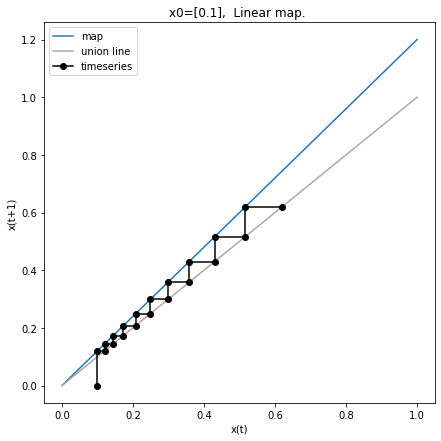

In [57]:
f = web_plot(x0=np.array([0.1]), f_rules=f_linear_factory(R=1.2))
plt.show()
f.savefig("./images/web_plot_linear.png", dpi=150, bbox_inches="tight")

## Logistic map
In the following we will look at a non-linear 1-dimensional map in more detail, the famous logistic map.

Again we define a function factory which gives us our logistic map for a defined R.

In [58]:
def f_logistic_factory(R=1.0):
    
    def f_logistic(x, R=R):
        """R * x * (1-x)"""
        return R * x * (1-x)
        
    return f_logistic

In [59]:
df1 = map_simulate(x0 = np.array([0.5]), f_rules=f_logistic_factory(R=1.5), steps=10)

'x0 = [0.5]'
           S0  time
x0   0.500000     0
x1   0.375000     1
x2   0.351562     2
x3   0.341949     3
x4   0.337530     4
x5   0.335405     5
x6   0.334363     6
x7   0.333847     7
x8   0.333590     8
x9   0.333461     9
x10  0.333397    10
----------------------------------------


We found that for `R=1.5` the steady state is `1/3`. We can check this by starting from the steady state value.

In [60]:
# start in steady state
df1 = map_simulate(x0 = np.array([1.0/3.0]), f_rules=f_logistic_factory(R=1.5))

'x0 = [0.33333333]'
           S0  time
x0   0.333333     0
x1   0.333333     1
x2   0.333333     2
x3   0.333333     3
x4   0.333333     4
x5   0.333333     5
x6   0.333333     6
x7   0.333333     7
x8   0.333333     8
x9   0.333333     9
x10  0.333333    10
----------------------------------------


'x0 = [0.5]'
           S0  time
x0   0.500000     0
x1   0.375000     1
x2   0.351562     2
x3   0.341949     3
x4   0.337530     4
x5   0.335405     5
x6   0.334363     6
x7   0.333847     7
x8   0.333590     8
x9   0.333461     9
x10  0.333397    10
----------------------------------------


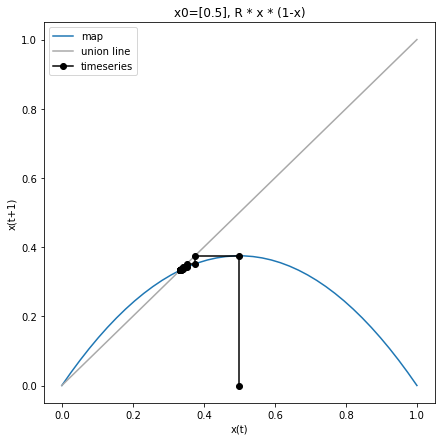

In [61]:
f = web_plot(x0=np.array([0.5]), f_rules=f_logistic_factory(R=1.5), steps=10)
plt.show()
# f.savefig("./images/web_plot_logistic.png", dpi=150, bbox_inches="tight")

For R>3 we see interesting behavior of the logistic map.

'x0 = [0.5]'
           S0  time
x0   0.500000     0
x1   0.927500     1
x2   0.249474     2
x3   0.694649     3
x4   0.786935     4
x5   0.622050     5
x6   0.872235     6
x7   0.413445     7
x8   0.899706     8
x9   0.334773     9
x10  0.826217    10
x11  0.532690    11
x12  0.923535    12
x13  0.261992    13
x14  0.717337    14
x15  0.752257    15
x16  0.691420    16
x17  0.791559    17
x18  0.612124    18
x19  0.880858    19
x20  0.389353    20
----------------------------------------


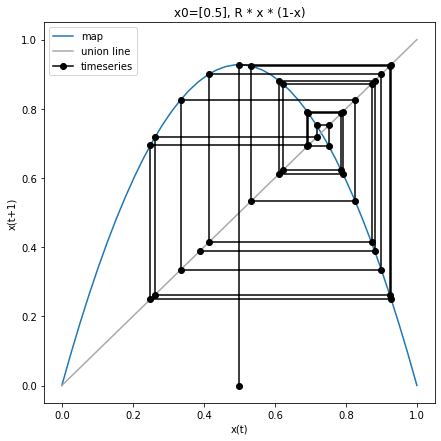

In [64]:
f = web_plot(x0=np.array([0.5]), f_rules=f_logistic_factory(R=3.71), steps=20)
plt.show()